<a href="https://colab.research.google.com/github/AshikSathiya/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
###Ashik Sathiya



#Load and Inspect Data


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 8523 Rows and 12 Columns. The following data types are present:
* 4 float
* 1 integer
* 7 string

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Clean Data

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).*italicized text*

##Checking Data Types

In [6]:
# Check object data types
object_col = df.select_dtypes(include='object')
object_col

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
# Check Float data types
float_col = df.select_dtypes(include='float64')
float_col

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [8]:
# Check Int data types
int_col = df.select_dtypes(include='int64')
int_col

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


##Duplicate Filter

In [9]:
# Duplicate Filter

duplicated_rows = df.duplicated()
duplicated_rows

# Calculate the sum of the duplicated_rows filter
duplicated_rows.sum()

0

It looks like we do not have any duplicate rows

##Missing Values

In [10]:
# Get the number of null values for all columns and save as a variable
null_values = df.isna().sum()
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 null values present for Item_Weight Column and 2410 null values present in the Outlet_Size column

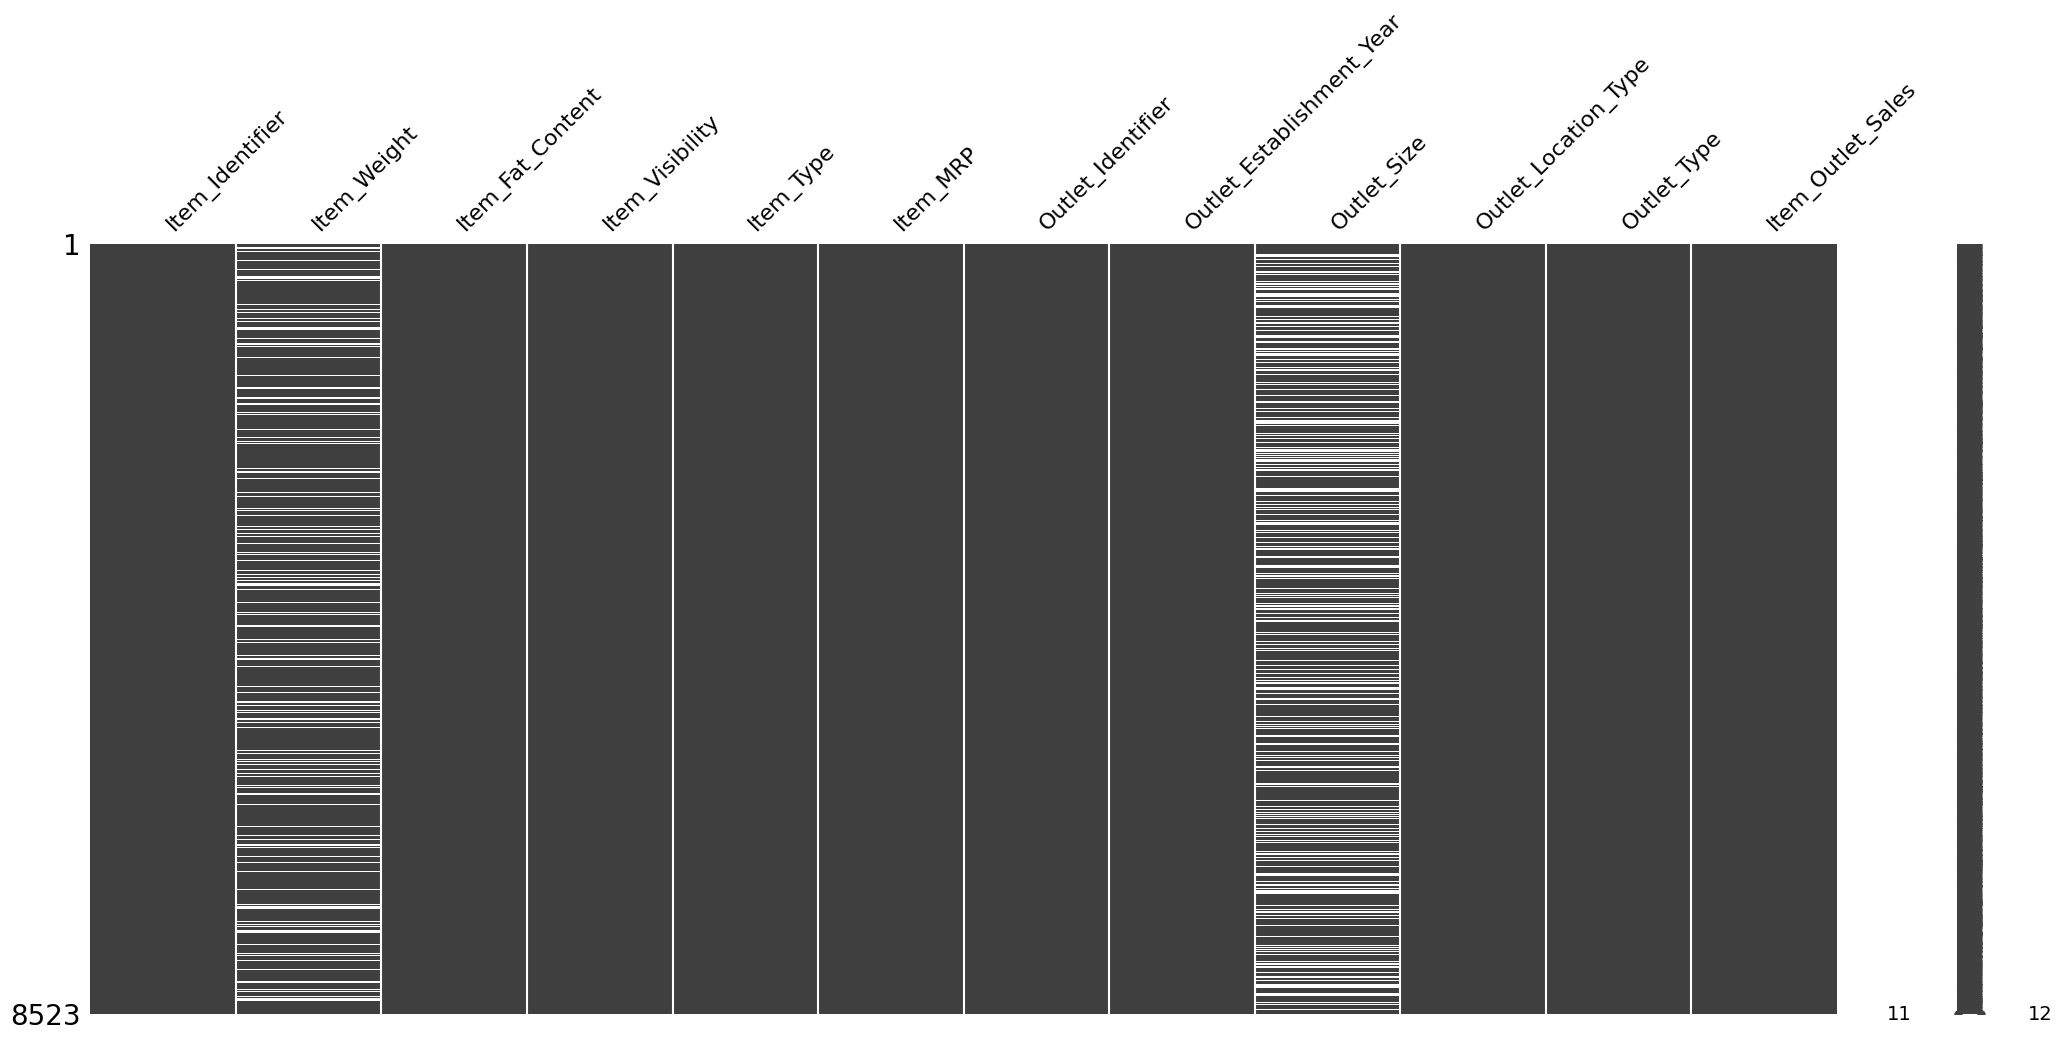

In [11]:
# Visualize the missing values matrix plot.
import missingno as msno
msno.matrix(df);

###Fixing Null Values


In [12]:
# save list of float column name.
float_cols = df.select_dtypes('float64').columns
float_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [13]:
# use the list of float columns to fill null values with 0.0
df[float_cols] = df[float_cols].fillna(-1)
df[float_cols].isna().sum()

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
#Check again
null_values = df.isna().sum()
null_values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The null values in the float data type column,Item_Weight, has been addressed however we still need to address Outlet_Size

In [15]:
# save list of categorical column name.
object_cols = df.select_dtypes('object').columns
object_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [16]:
# use the list of float columns to fill null values with "MISSING"
df[object_cols] = df[object_cols].fillna("MISSING")
df[object_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

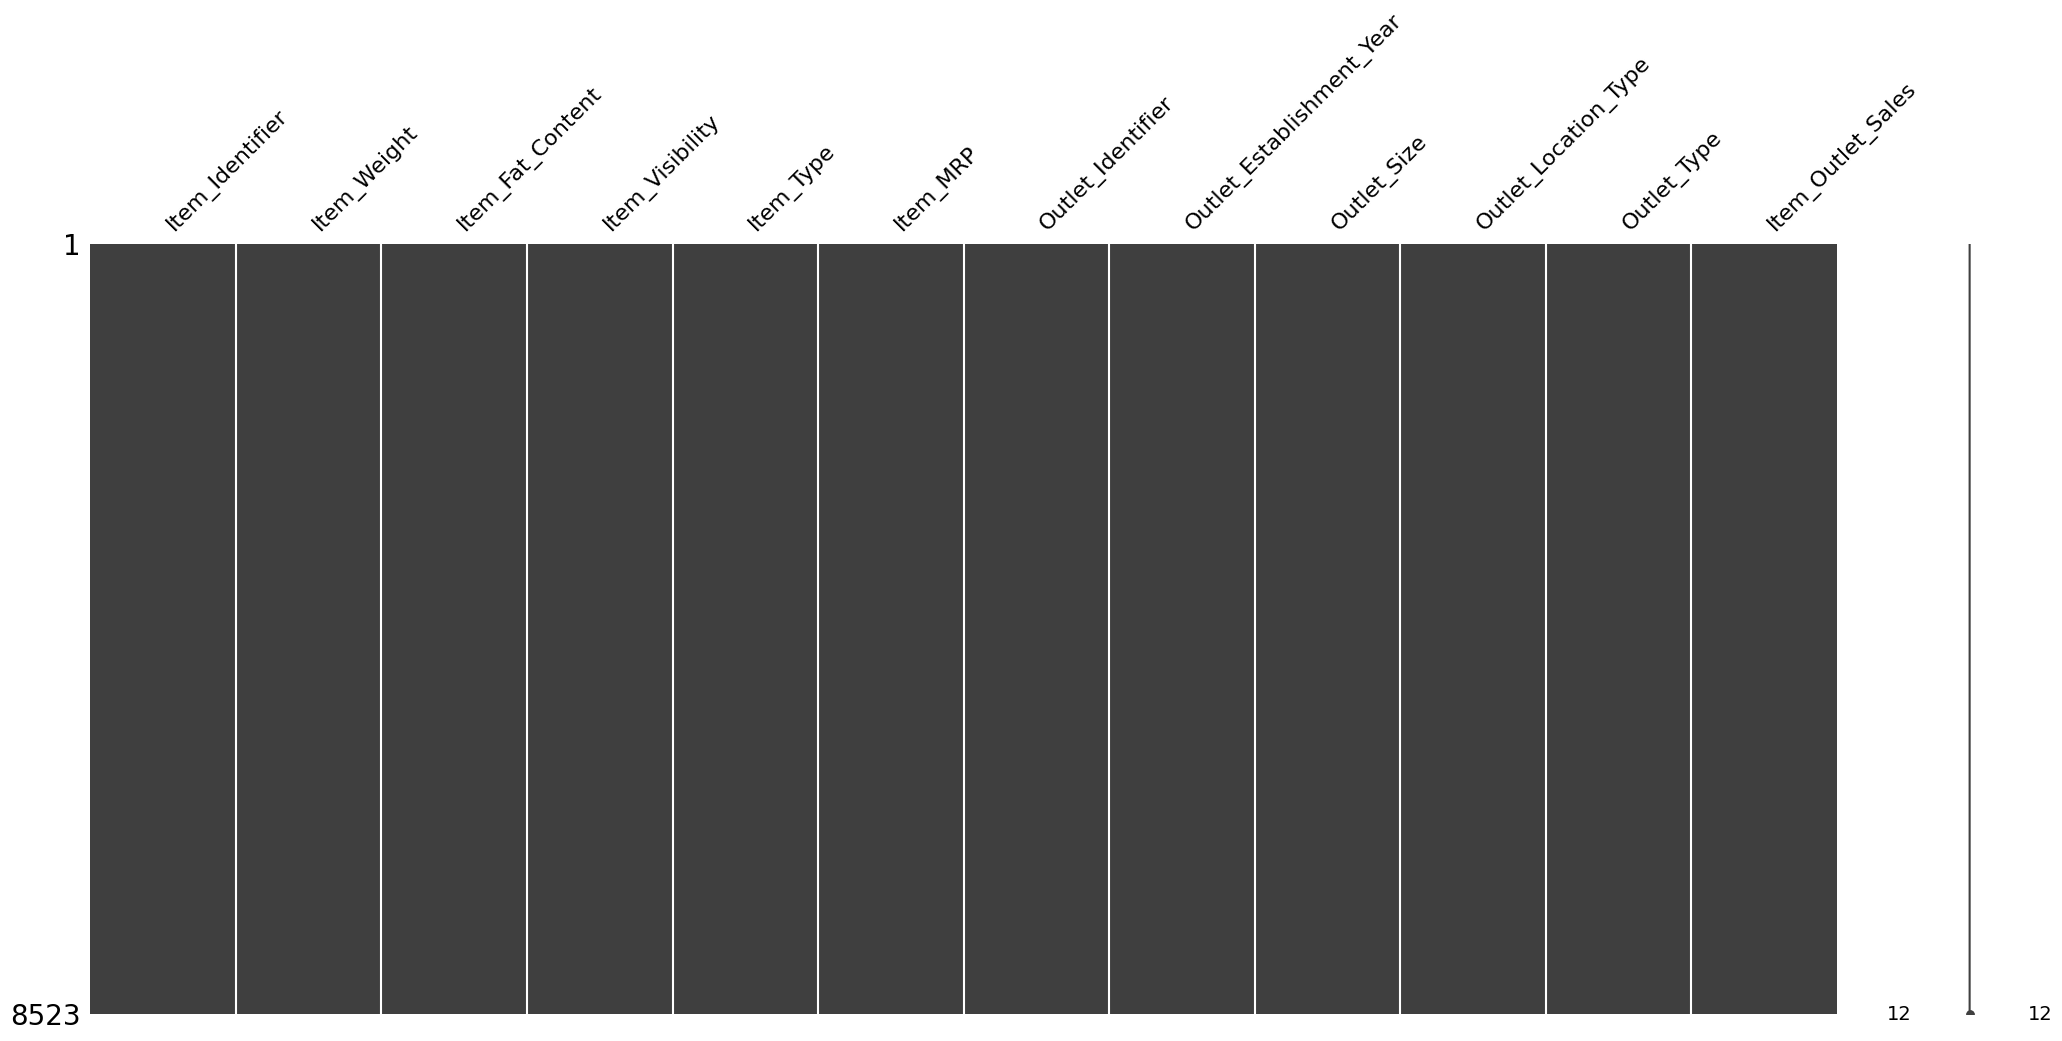

In [17]:
msno.matrix(df);

There are now no missing values!

##Inconsistent Values

In [18]:
# Check the nunique for just the object cols
object_nunique = df[object_cols].nunique()
object_nunique

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

It appears as though Item_Fat_Content, Outlet_Size, Outlet_Location_Type, and Outlet_Type have a small amount of values, we will look more into these columns

In [19]:
# Drop the columns listed above
df.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier"], axis=1, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,1998,MISSING,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
# Remake the list of string columns (after dropping previous cols)
# loop through the list of string columns and print the value counts for the column


string_columns = df.select_dtypes(include='object').columns

for col in string_columns:
    value_counts = df[col].value_counts()
    print(value_counts)
    print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



Inconsitent values are present in the Item_Fat_Content

In [21]:
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
Item_Fat_Content_counts = df['Item_Fat_Content'].value_counts()
print(Item_Fat_Content_counts)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Rather than having 5 values, we should only have 2 (Low Fat and Regular)

In [22]:
# Standardize the values in the Central column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"Low Fat"})
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"low fat":"Low Fat"})
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"reg":"Regular"})


df['Item_Fat_Content'].value_counts()
# Check the value counts again to confirm
Item_Fat_Content_counts = df['Item_Fat_Content'].value_counts()
print(Item_Fat_Content_counts)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


##Numerical Values Summary

In [23]:
df.describe(include="number")


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


For any numerical columns, we obtained the summary statistics of each (min, max, mean)

#Exploratory Data Analysis (Part 3)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   object 
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


##Correlation HeatMap

[Text(0.5, 1.0, 'Correlation Heatmap')]

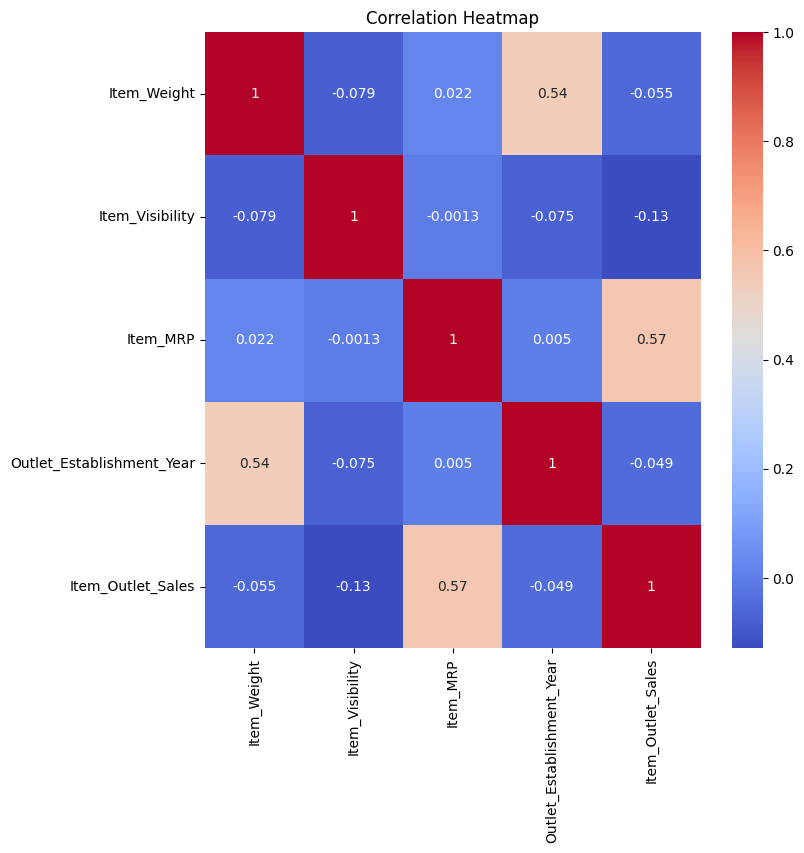

In [26]:
# Find correlations
corr = df.corr(numeric_only = True)
corr.round(2)

# Make a heatmap using the correlations from above
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

ax.set(title='Correlation Heatmap')

Here is a Correlation HeatMap, of all numeric values. Item_MRP and Iten_Outlet_Sales have the highest correlation score with 0.57.

Overall there are very few strong correlations, with rest either being very positively low or negative

##Histogram

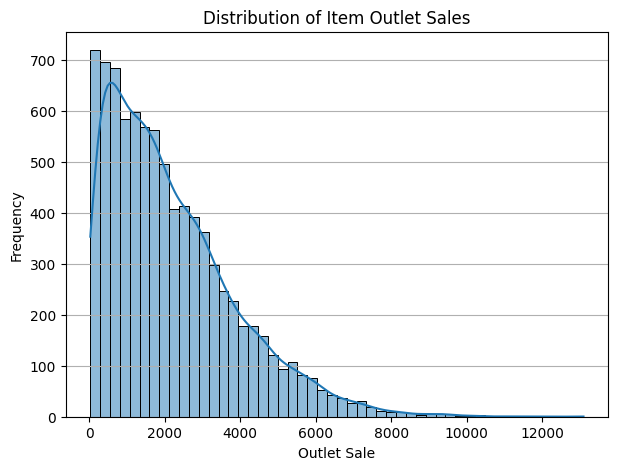

In [27]:
# Create a histogram
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Item_Outlet_Sales', bins=50, kde=True)

# plot title
plt.title('Distribution of Item Outlet Sales')

# axis labels
plt.xlabel('Outlet Sale')
plt.ylabel('Frequency')

# Add gridlines
plt.grid(axis='y')

Here we can see a histogram of the Item Outlet Sales. As we can see it is very much positively skewed with the highest count occuring to the left of the graph.

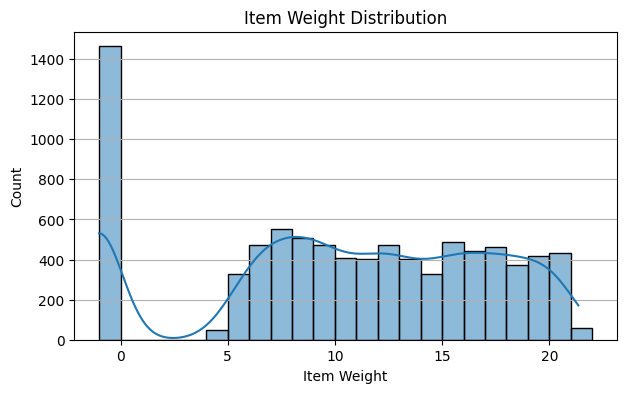

In [28]:
# Create a histogram of Item_Weight and save the axis object
plt.figure(figsize=(7, 4))
ax = sns.histplot(data=df, x="Item_Weight", binwidth=1, kde = True)

# Set plot title
ax.set_title('Item Weight Distribution')

#axis labels
ax.set_xlabel('Item Weight')
ax.set_ylabel('Count')

# gridlines
ax.grid(axis='y')


This histogram was interesting. Apart from the Item_Weight 0 having hte highest count, the item weight distribution appeared to be mostly evenly distributed.

##Boxplot

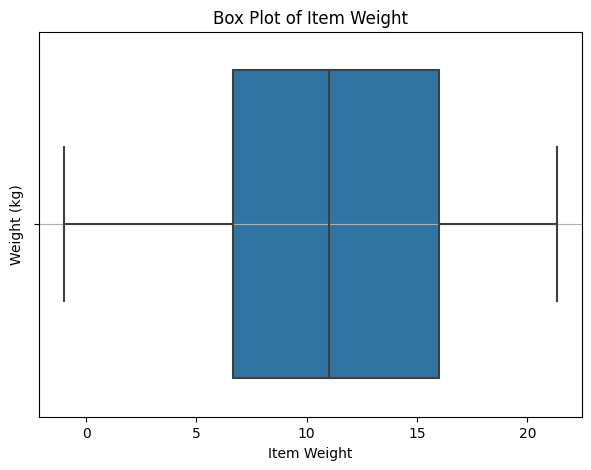

In [29]:
# Create a boxplot of Item_Weight
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Item_Weight')

# Set plot title
plt.title('Box Plot of Item Weight')

#and axis labels
plt.xlabel('Item Weight')
plt.ylabel('Weight (kg)')

# Add gridlines
plt.grid(axis='y')


This is a box plot for Item Weight. Here we can see the median, IQR and Min and Max Values. Overall it is pretty much consitent with the previous historgram witht he inner and outer quartiles being mostly the same distance from the median.

##Countplot

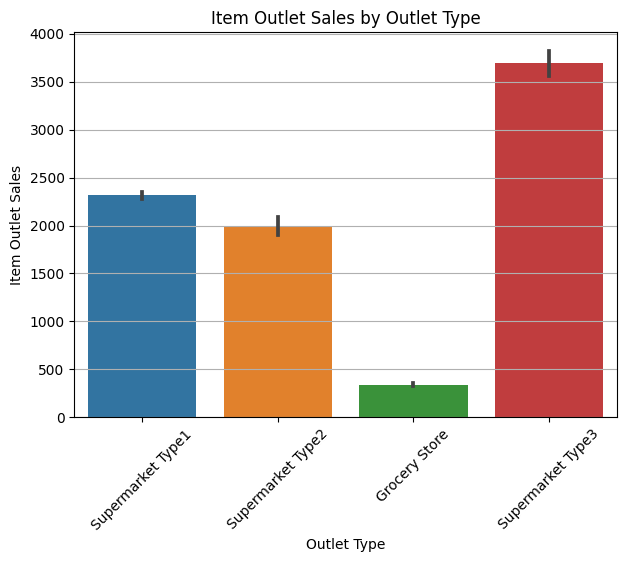

In [31]:
# Create a countplot
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')

# Set plot title and axis labels
plt.title('Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

# Rotate x-axis tick labels
ax.tick_params(axis='x', rotation=45)

# Add gridlines
plt.grid(axis='y')


Here we have a countplot for Item Outlet Sales by Outlet Type. This is a very insightful plot in that we are able to see which Outlet Type produces highest Sales. According to the plot Supermarket Type 3 produces the highest sales with Grocery Store performing far below that.



#Exploratory Data Analysis